In [1]:
from expander import *
import matplotlib.pyplot as plt
import cvxpy as cp

plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
def restore_coords():
    coords=[[0,0],
            [1,0],
            [2,0.5],
            [2.5,1]]
    return coords

coords = restore_coords()

In [3]:
# constraints
A, lb, ub = generate_constraints(coords, lb_=1, ub_=1e5)
x = cp.Variable(2*len(coords))
constraints = [
    A@x <= ub,
    lb <= A@x,
    x[0] <= 0,
    x[0] >= 0,
    x[1] <= 0,
    x[1] >= 0,
    x[2] <= 0,
    x[2] >= 0,
    x[3] <= 0,
    x[3] >= 0,
]

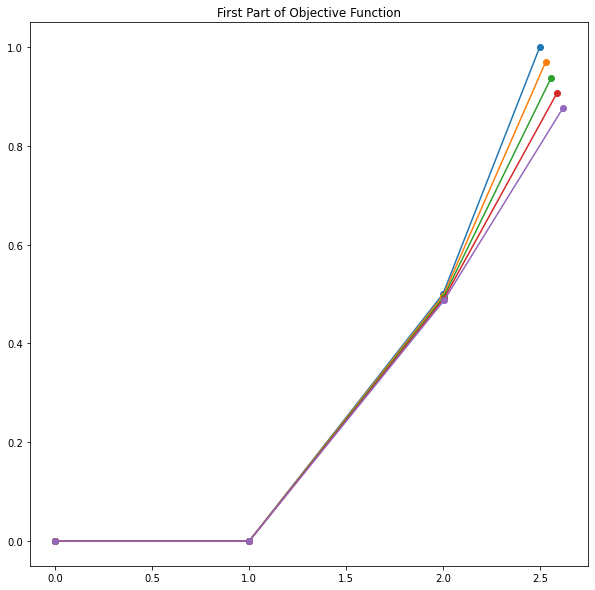

In [4]:
coords = restore_coords()

# only using the *FIRST* part of the objective function
obj_fun = obj_fun_generator(coords, first=True)

# expand and display
expand(coords, constraints=constraints, x=x, obj_fun=obj_fun, step_size=1e-7)
_ = plt.title('First Part of Objective Function')

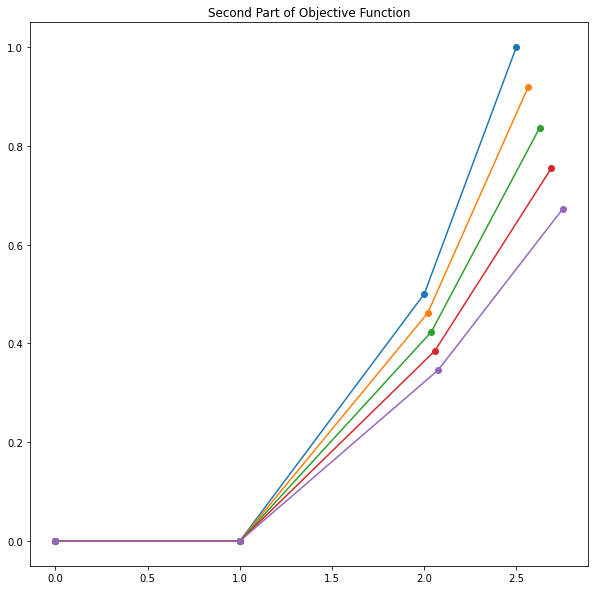

In [5]:
coords = restore_coords()

# only using the *SECOND* part of the objective function
obj_fun = obj_fun_generator(coords, second=True)

# expand and display
expand(coords, constraints=constraints, x=x, obj_fun=obj_fun, step_size=1e-7)
_ = plt.title('Second Part of Objective Function')

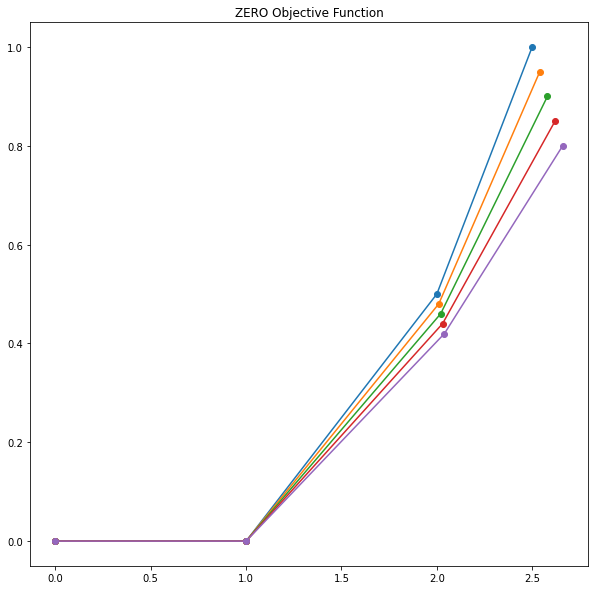

In [6]:
coords = restore_coords()

# using the *ZERO* objective function
obj_fun = 0

# expand and display
expand(coords, constraints=constraints, x=x, obj_fun=obj_fun, step_size=1e-3)
_ = plt.title('ZERO Objective Function')

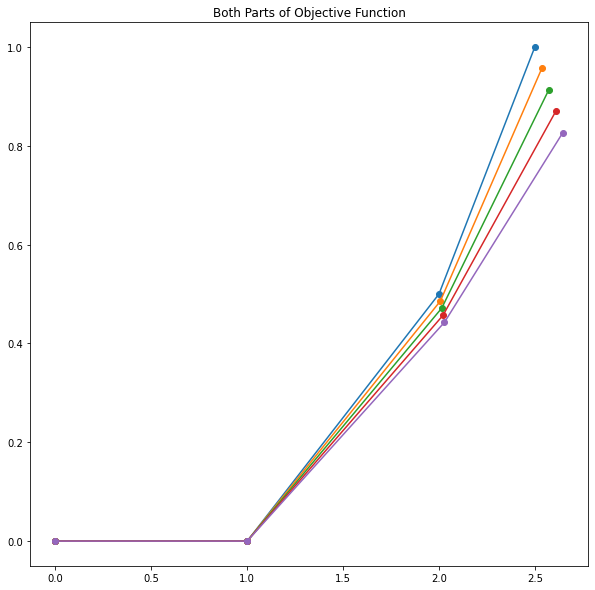

In [7]:
coords = restore_coords()

# using *BOTH* parts of the objective function
obj_fun = obj_fun_generator(coords, both=True)

# expand and display
expand(coords, constraints=constraints, x=x, obj_fun=obj_fun, step_size=1.5e-7)
_ = plt.title('Both Parts of Objective Function')